In [2]:
import numpy as np

In [73]:
data = np.genfromtxt('./input.txt', delimiter=1).astype(int)

### Part 1
thought about doing convolution with a kernel but this is probably faster as we only have to check D4 connectivity

In [73]:
padded = np.pad(data, (1), mode='constant', constant_values=np.iinfo(data.dtype).max)
# create 4 arrays where at each location, the pixel value is that of the input array's neighbour
# to the (s,n,w,e)
below = np.roll(padded, -1, axis=0)
above = np.roll(padded, 1, axis=0)
left = np.roll(padded, 1, axis=1)
right = np.roll(padded, -1, axis=1)
# a cell is a sink if it is lower than any of the four neighbour cells
nbr_mins = np.stack((below, above, left, right)).min(axis=0)
sinks = (padded < nbr_mins).astype(int)

In [126]:
# answer is n sinks plus the value of those sinks
print(f"Part 1: {sinks.sum() + (padded * sinks).sum()}")

Part 1: 504


# Part 2 
this felt like watershed/catchment analysis but actually the data has 9s marking the watershed lines so the "basins" are not connected and therefore we can do connected component analysis, i.e. we find connected regions in a mask of data != 9

which I am not going to attempt to code up today

In [109]:
from scipy.ndimage.measurements import label

In [131]:
# the default "structure" for this function is already D4 connectivity so no need to pass
labels, nlabels = label(data!=9)

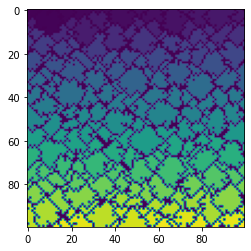

In [127]:
from matplotlib.pyplot import imshow
imshow(labels)

In [132]:
basin_ids, basin_sizes = np.unique(labels, return_counts=True)

In [133]:
basin_ids, basin_sizes

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [141]:
# the background, zero, i.e. locations where the data was 9, is zero in the basin ids map
# there are likely more of this than any other value so remove from the counts
basin_id_0_idx = np.argwhere(basin_ids==0)
basin_sizes[basin_id_0_idx] = 0
three_largest_basin_sizes = sorted(basin_sizes, reverse=True)[:3]
print(f"Part 2: {np.prod(three_largest_basin_sizes)}")

Part 2: 1558722
